# Загрузка и подготовка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame
df = pd.read_csv('../data/caesarian/caesarian_preprocessed.csv' )
del df['Unnamed: 0']
df

,Age,Heart_Problem,Caesarian,Delivery_number_1,Delivery_number_2,Delivery_number_3,Delivery_number_4,Blood_of_Pressure_0,Blood_of_Pressure_1,Blood_of_Pressure_2,Delivery_time_0,Delivery_time_1,Delivery_time_2
0,22,0,0,1,0,0,0,0,0,1,1,0,0
1,26,0,1,0,1,0,0,0,1,0,1,0,0
2,26,0,0,0,1,0,0,0,1,0,0,1,0
3,28,0,0,1,0,0,0,0,0,1,1,0,0
4,22,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,27,0,0,0,1,0,0,0,1,0,0,1,0
76,33,0,1,0,0,0,1,0,1,0,1,0,0
77,29,0,1,0,1,0,0,0,0,1,0,1,0
78,25,0,1,1,0,0,0,1,0,0,0,0,1


In [4]:
df['Caesarian'].unique()

array([0, 1])

In [5]:
df1 = df[:]
del df1['Caesarian']


In [6]:
X = df1.iloc[:, :].values
y = df.iloc[:, 2].values
print(X)

[[22  0  1  0  0  0  0  0  1  1  0  0]
 [26  0  0  1  0  0  0  1  0  1  0  0]
 [26  0  0  1  0  0  0  1  0  0  1  0]
 [28  0  1  0  0  0  0  0  1  1  0  0]
 [22  0  0  1  0  0  0  1  0  1  0  0]
 [26  0  1  0  0  0  1  0  0  0  1  0]
 [27  0  0  1  0  0  0  1  0  1  0  0]
 [32  0  0  0  1  0  0  1  0  1  0  0]
 [28  0  0  1  0  0  0  1  0  1  0  0]
 [27  0  1  0  0  0  0  1  0  0  1  0]
 [36  0  1  0  0  0  0  1  0  1  0  0]
 [33  0  1  0  0  0  1  0  0  0  1  0]
 [23  0  1  0  0  0  0  1  0  0  1  0]
 [20  1  1  0  0  0  0  1  0  1  0  0]
 [29  1  1  0  0  0  1  0  0  0  0  1]
 [25  0  1  0  0  0  1  0  0  0  0  1]
 [25  0  1  0  0  0  0  1  0  1  0  0]
 [20  0  1  0  0  0  0  0  1  0  0  1]
 [37  1  0  0  1  0  0  1  0  1  0  0]
 [24  1  1  0  0  0  1  0  0  0  0  1]
 [26  0  1  0  0  0  0  1  0  0  1  0]
 [33  1  0  1  0  0  1  0  0  1  0  0]
 [25  0  1  0  0  0  0  0  1  0  1  0]
 [27  1  1  0  0  0  1  0  0  1  0  0]
 [20  1  1  0  0  0  0  0  1  1  0  0]
 [18  0  1  0  0  0  0  1

In [7]:
print(y)

[0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 1 0]


In [8]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train

array([[ 1.59921417, -0.72374686,  0.93933644, -0.72374686, -0.32163376,
        -0.1796053 , -0.62554324,  1.        , -0.52915026,  0.8542422 ,
        -0.50487816, -0.52915026],
       [-0.00942562, -0.72374686, -1.06458129,  1.38169856, -0.32163376,
        -0.1796053 , -0.62554324,  1.        , -0.52915026,  0.8542422 ,
        -0.50487816, -0.52915026],
       [ 0.99597425,  1.38169856, -1.06458129,  1.38169856, -0.32163376,
        -0.1796053 ,  1.59861051, -1.        , -0.52915026,  0.8542422 ,
        -0.50487816, -0.52915026],
       [-0.00942562, -0.72374686, -1.06458129,  1.38169856, -0.32163376,
        -0.1796053 , -0.62554324,  1.        , -0.52915026,  0.8542422 ,
        -0.50487816, -0.52915026],
       [ 0.19165435,  1.38169856,  0.93933644, -0.72374686, -0.32163376,
        -0.1796053 ,  1.59861051, -1.        , -0.52915026, -1.17062819,
        -0.50487816,  1.88982237],
       [ 1.39813419, -0.72374686, -1.06458129,  1.38169856, -0.32163376,
        -0.1796053 , -

# Классификация

## Метод k-ближайших соседей (K-Nearest Neighbors)

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

[[3 3]
 [3 7]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.70      0.70      0.70        10

    accuracy                           0.62        16
   macro avg       0.60      0.60      0.60        16
weighted avg       0.62      0.62      0.62        16



## Классификатор дерева решений (Decision Tree Classifier)

In [54]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [55]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 2]
 [5 5]]
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.71      0.50      0.59        10

    accuracy                           0.56        16
   macro avg       0.58      0.58      0.56        16
weighted avg       0.61      0.56      0.57        16



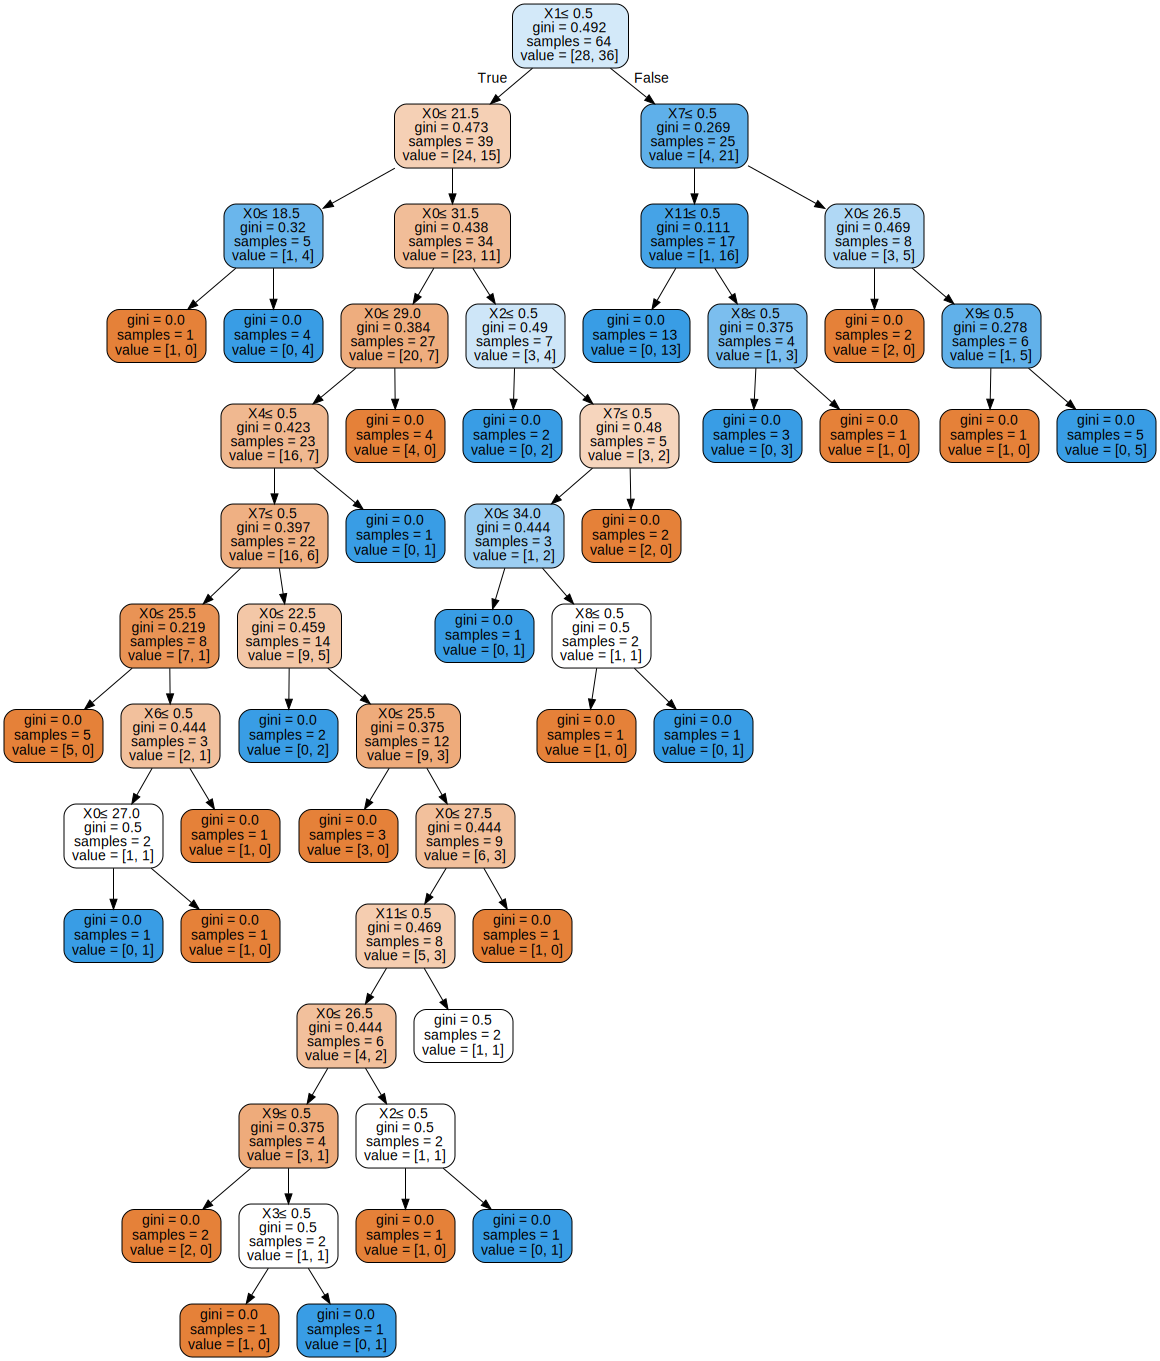

In [56]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("caesarian")
graph = graphviz.Source(dot_data)  
graph

## Наивный байесовский классификатор (Naive Bayes)

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6 0]
 [9 1]]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         6
           1       1.00      0.10      0.18        10

    accuracy                           0.44        16
   macro avg       0.70      0.55      0.38        16
weighted avg       0.78      0.44      0.33        16



## Метод опорных векторов (Support Vector Machines)

In [18]:
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 2]
 [1 9]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.82      0.90      0.86        10

    accuracy                           0.81        16
   macro avg       0.81      0.78      0.79        16
weighted avg       0.81      0.81      0.81        16



## Логистическая регрессия (Logistic Regression)


In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4 2]
 [2 8]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.80      0.80      0.80        10

    accuracy                           0.75        16
   macro avg       0.73      0.73      0.73        16
weighted avg       0.75      0.75      0.75        16



## Выводы

Меньше ошибок сделали метод опорных векторов и логическая регрессия.

У наивного байесовского классификатора наибольшая хорошая точность 1 класса, но очень низкая полнота, из-за чего низкие значения оценок F1

У метода k - ближайших соседей и классификатора дерева решений достаточно низкая точность и полнота.

Из-за небольшого количества данных результаты классификации получились удовлетворительными. Для более точных показателей нужно иметь выборку большего размера.

# Кросс-валидация

In [61]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [12 13 15 16 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 14 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 14 17 18 19 27 29 30 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79] TEST: [12 13 15 16 20 21 22 23 24 25 26 28 31 32 33 34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 31 32 33 34 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79] TEST: [27 29 30 35 36 37 38 39 40 41 42 43 44 45 46 47]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 63 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79] TEST: [48 49 50 51 5

In [62]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.60      0.67      0.63         9

    accuracy                           0.56        16
   macro avg       0.55      0.55      0.55        16
weighted avg       0.56      0.56      0.56        16

0.5625
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.60      0.67      0.63         9

    accuracy                           0.56        16
   macro avg       0.55      0.55      0.55        16
weighted avg       0.56      0.56      0.56        16

0.5625
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.67      0.67      0.67         9

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16

0.625

# Подбор гиперпараметров

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()

clf = GridSearchCV(knn, parameters)

clf.fit(X_train, y_train)

clf.cv_results_

{'mean_fit_time': array([0.00055718, 0.00046997, 0.0004652 , 0.00041404, 0.0004447 ]),
 'mean_score_time': array([0.00170236, 0.00154648, 0.00144787, 0.00145569, 0.00158129]),
 'mean_test_score': array([0.48589744, 0.46923077, 0.51538462, 0.56538462, 0.64102564]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}],
 'rank_test_score': array([4, 5, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.38461538, 0.30769231, 0.38461538, 0.38461538, 0.53846154]),
 'split1_test_score': array([0.53846154, 0.69230769, 0.69230769, 0.69230769, 0.76923077]),
 'split2_test_score': array([0.46153846, 0.38461538, 0.53846154, 0.46153846, 0.53846154]),
 'split3_test_score': array([0.46153846, 0.46153846, 0.46153846, 0.53846154, 0.69230769]),
 'split4_test_score': array(

In [26]:
clf.best_params_

{'n_neighbors': 5}